In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### reading data

In [5]:
with open("sort_in_strategies.json") as fin:
    t = fin.read()

In [6]:
data = json.loads(t)

### preprocess

In [7]:
data_np = {}
for strategy, sentences in data.items():
    temp_data = np.zeros((len(sentences), 2))
    for i, sentence in enumerate(sentences):
        temp_data[i][0] = sentence["ch_mean"]
        temp_data[i][1] = sentence["en_mean"]
    data_np[strategy] = temp_data

### strategy-wise t-test and p-value

In [8]:
for strategy, arr in data_np.items():
    ttest_result = stats.ttest_ind(arr[:, 0], arr[:, 1])
    print(f"{strategy}")
    print(ttest_result)

feature_politeness_==2nd_person==
Ttest_indResult(statistic=5.013216824635514, pvalue=6.518243610949175e-07)
feature_politeness_==HASHEDGE==
Ttest_indResult(statistic=2.739274862402433, pvalue=0.0064343462420056305)
feature_politeness_==HASPOSITIVE==
Ttest_indResult(statistic=3.086263283994011, pvalue=0.0021374904860140373)
feature_politeness_==Direct_question==
Ttest_indResult(statistic=1.283687864637568, pvalue=0.20045901594645588)
feature_politeness_==Factuality==
Ttest_indResult(statistic=2.191478158625658, pvalue=0.033518621452833186)
feature_politeness_==SUBJUNCTIVE==
Ttest_indResult(statistic=5.014347806120296, pvalue=1.303276349218317e-06)
feature_politeness_==HASNEGATIVE==
Ttest_indResult(statistic=3.0162522921268438, pvalue=0.0027304133210836606)
feature_politeness_==1st_person==
Ttest_indResult(statistic=3.1550730557465334, pvalue=0.0017162019489397353)
feature_politeness_==Hedges==
Ttest_indResult(statistic=1.1460968851679547, pvalue=0.2531964558566462)
feature_politeness_=

### test

In [17]:
for strategy, arr in data_np.items():
    mean_diff = arr[:,0].mean() - arr[:,1].mean()
    print(f"{strategy}")
    ttest_result = stats.ttest_ind(arr[:, 0], arr[:, 1])
    print(ttest_result)    
    print(mean_diff)

feature_politeness_==2nd_person==
Ttest_indResult(statistic=5.013216824635514, pvalue=6.518243610949175e-07)
1.0886732031492625
feature_politeness_==HASHEDGE==
Ttest_indResult(statistic=2.739274862402433, pvalue=0.0064343462420056305)
0.8194027672708034
feature_politeness_==HASPOSITIVE==
Ttest_indResult(statistic=3.086263283994011, pvalue=0.0021374904860140373)
0.876601300899889
feature_politeness_==Direct_question==
Ttest_indResult(statistic=1.283687864637568, pvalue=0.20045901594645588)
0.5116263431526961
feature_politeness_==Factuality==
Ttest_indResult(statistic=2.191478158625658, pvalue=0.033518621452833186)
2.081382242962718
feature_politeness_==SUBJUNCTIVE==
Ttest_indResult(statistic=5.014347806120296, pvalue=1.303276349218317e-06)
2.4664096464826306
feature_politeness_==HASNEGATIVE==
Ttest_indResult(statistic=3.0162522921268438, pvalue=0.0027304133210836606)
1.0685205834452063
feature_politeness_==1st_person==
Ttest_indResult(statistic=3.1550730557465334, pvalue=0.0017162019489

### plot

Text(0,0.5,'Frequency')

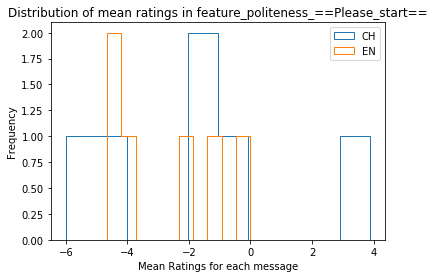

In [15]:
target = "feature_politeness_==Please_start=="
arr = data_np[target]

plt.hist(arr[:, 0], histtype='step', rwidth=0.01, label="CH")
plt.hist(arr[:, 1], histtype='step', rwidth=0.01, label="EN")
plt.legend()
plt.title(f"Distribution of mean ratings in {target}")
plt.xlabel("Mean Ratings for each message")
plt.ylabel("Frequency")

In [19]:
import pprint
pprint.pprint(json.loads(t)['feature_politeness_==Deference=='])

[{'Num': 6,
  'Request': 'Good work on the canal junctions! Where appropriate, do you '
             'think we should give the nearest pedestrian access point, from '
             'the road (as opposed to canal) network?',
  'ch_mean': 8.0,
  'en_mean': 7.25},
 {'Num': 78,
  'Request': 'What would the recommended sequencing be, then?... Good Article '
             'then Feautred Article recommendation?',
  'ch_mean': -0.4000000059604645,
  'en_mean': -0.1111111119389534},
 {'Num': 212,
  'Request': 'Great job. Will it be done by next week?',
  'ch_mean': 3.200000047683716,
  'en_mean': 7.44444465637207},
 {'Num': 265,
  'Request': 'Good idea.... Perhaps though you could also make a list of kings '
             'on that page??',
  'ch_mean': 3.4000000953674316,
  'en_mean': 4.75},
 {'Num': 286,
  'Request': 'Nice work so far on your rewrite of "The One After the '
             'Superbowl". Are you planning on including info about the Diet '
             'Coke fiasco?',
  'ch_mean': 2.0,

In [2]:
import pprint
from politeness.api_util import get_scores_strategies_token_indices
ret = get_scores_strategies_token_indices("what are you doing?")
pprint.pprint(ret)

{'score_impolite': 0.632821357716149,
 'score_polite': 0.3671786422838511,
 'sentences': [{'impolite_index': {1, 4},
                'involved_index': {1, 3, 4},
                'polite_index': [],
                'tokens': ['what', 'are', 'you', 'doing', '?']}],
 'strategies': ['feature_politeness_==2nd_person==',
                'feature_politeness_==Direct_question==']}
